## Week 7:  Unsupervised Learning
### Clustering
  
 

### Unsupervised Learning
Uncovering hidden structure from **unlabeled data**

- Clustering
- Latent (hidden) variable modeling: mixture models, factor analysis
- Dimensionality reduction, matrix factorization and feature selection


### Clustering
In clustering we attempt to group observations in such a way that observations assigned to the same cluster are more similar to each other than to observations in other clusters. Usually, the number of categories (clusters) is also unknown.

Although labels may be known, clustering is usually performed on unlabeled data as a step in exploratory data analysis.

The best method to use will vary depending on the particular problem.

Can you think of examples of clustering problems?

### Comparison of observations

"observations assigned to the same cluster **are more similar**". What does it mean?


Minkowsky distance:  $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

for Euclidean: p=2

for Manhattan: p=1

In [57]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.spatial.distance
from sklearn.metrics import pairwise_distances

(0.9320043365216344, 2.0874214459086566, 3.922291445306489, 5.077708554693511)

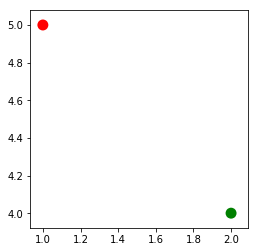

In [58]:
### Distances and similarities between data points
X = np.array([[1, 5], 
              [2, 4]])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.scatter(X[...,0], X[...,1], c=("red", "green"), s=120, edgecolors='none')
ax.set_autoscale_on(False)
ax.axis('square')

In [59]:
D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
print()

Euclidean
 [[0.         1.41421356]
 [1.41421356 0.        ]]



In [60]:
D = pairwise_distances(X, metric = 'manhattan')
print("Manhattan\n", D)

Manhattan
 [[0. 2.]
 [2. 0.]]


In [81]:
## Works the same way for 3 or higher dimensions:
X = np.array([[6, 0.0, 1.0], 
              [2, 1, 3.0]])

D = pairwise_distances(X, metric = 'euclidean')
print("Euclidean\n", D)
D = pairwise_distances(X, metric = 'manhattan')
print("\nManhattan\n", D)
D = pairwise_distances(X + 10, metric = 'cosine')
print("\nCosine\n", D)
D = pairwise_distances(X + 10, metric = 'correlation')
print("\nCorrelation\n", D)

Euclidean
 [[0.         4.58257569]
 [4.58257569 0.        ]]

Manhattan
 [[0. 7.]
 [7. 0.]]

Cosine
 [[0.         0.02196149]
 [0.02196149 0.        ]]

Correlation
 [[0.         0.84445725]
 [0.84445725 0.        ]]


In [80]:
## What about binary data
binary = np.array([[0, 0, 1, 1, 1, 0, 0], 
                   [0, 1, 1, 1, 0, 0, 0]], dtype=np.bool)
print(binary)
D = pairwise_distances(binary, metric = 'jaccard')
print("\nJaccard\n", D)
D = pairwise_distances(binary, metric = 'hamming')
print("\nHamming\n", D)

[[False False  True  True  True False False]
 [False  True  True  True False False False]]

Jaccard
 [[0.  0.5]
 [0.5 0. ]]

Hamming
 [[0.         0.28571429]
 [0.28571429 0.        ]]


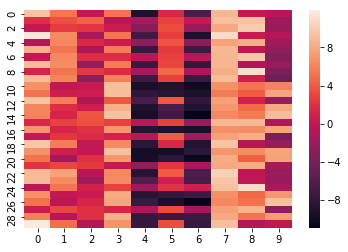

Distribution of pairwise distances


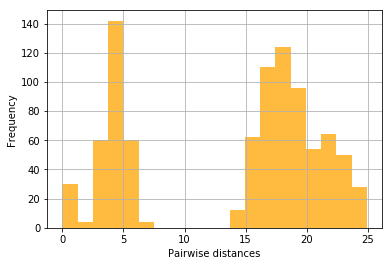

In [100]:
# Synthetic datasets:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=30, centers=3, n_features=10, random_state=0, cluster_std=1)


sns.heatmap(X)
plt.show()

D = pairwise_distances(X, metric='euclidean', n_jobs=-1)
print("Distribution of pairwise distances")
plt.hist(np.hstack(D), 20, facecolor='orange', alpha=0.75)
plt.xlabel('Pairwise distances')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

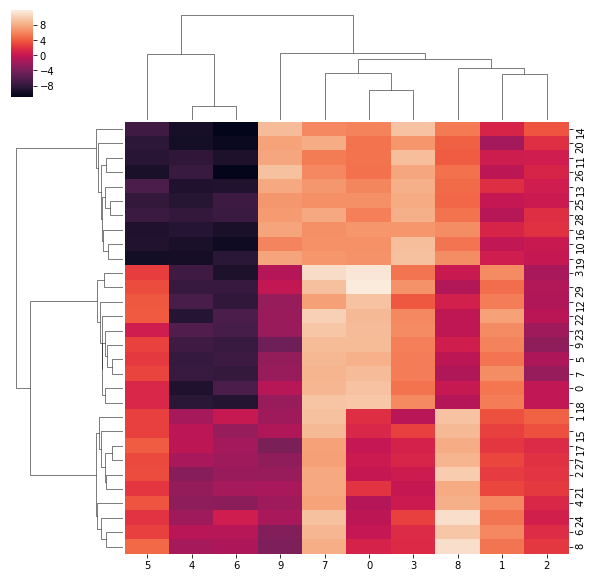

In [103]:
# Clustering of data reveals its inner structure
sns.clustermap(X)
plt.show()

### Different clustering algorithms implemented in scikit-learn

Note the last row is completely homogeneous, however clustering algorithm still reports "some inner structure"

![Cluster comparison](http://scikit-learn.org/0.20/_images/sphx_glr_plot_cluster_comparison_001.png)
[Cluster comparison](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)


### Families of clustering algorithms

All of the algorithms are "Hard clustering" methods: each object belongs to a cluster or not

**Connectivity**: agglomerative hierarchical clustering

**Centroids**: k-means, Mean Shift

**Density**: DBSCAN

**Distributions**: GMM (next class)

**Affinity**: Affinity propagation, Spectral clustering (next classes)



In [ ]:

K-Means (most popular) algorithm.

Iterative, multi-step
Step 1: Choose centroids
Step 2: Assign clusters
    
![Kmeans](https://uploads.toptal.io/blog/image/92528/toptal-blog-image-1463672901961-c86610183bb2ba67f979c421f6748893.gif)

Repeat until convergence / max iterations

![Kmeans](https://cdn-images-1.medium.com/max/1600/1*KrcZK0xYgTa4qFrVr0fO2w.gif)

**K-means** clustering divides samples between clusters by attempting to minimize the within-cluster sum of squares. It is an iterative algorithm repeatedly updating the position of the centroids (cluster centers), re-assigning samples to the best cluster and repeating until an optimal solution is reached. The clusters will depend on the starting position of the centroids so k-means is often run multiple times with random initialization and then the best solution chosen.

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

To get the sum of squared distances of samples to their cluster center:

    model.inertia_

Note: Inertia is comparatively meaningful, absolutely meaningless (lower is better).



Issue: K-means can converge to a local (and not global) optima.
    
K-means++ algorithm:
- Choose random data point as first centroid.
- Choose following centroids based on distance.



### Recall the Iris Dataset

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()

columns = ("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

iris_4d = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns=columns)
iris_true_labels = iris_4d["species"]
iris_4d = iris_4d.drop(columns="species")

iris = iris_4d.drop(columns=["petal_width", "petal_length"])
#print(iris_4d)
#print(iris)

In [109]:
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters=2,
    init='k-means++', # default, also: random
    n_init=10, # default, also: 5, 1
    max_iter=300, # default
    tol=1e-4, # default
    random_state=123124,
)
model.fit(iris)
cluster_labels = model.predict(iris)
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0]


In [115]:
def plot_kmeans(original_data, cluster_labels, model, k):
    """Plot the clusters and centroids for a model trained on the Iris dataset."""
    # Scatter plots of each species
    for cluster_idx in range(k):
        plt.scatter(
            original_data.iloc[cluster_labels == cluster_idx, 0],
            original_data.iloc[cluster_labels == cluster_idx, 1],
            label="Cluster #{}".format(cluster_idx),
        )
    plt.legend()
    #plt.scatter(original_data[cluster_labels == 1, 0], original_data[cluster_labels == 1, 1], s = 100, c = 'blue', label = 'Species 1')

    # Add centroids to plot
    plt.scatter(
        model.cluster_centers_[:, 0],
        model.cluster_centers_[:, 1],
        s=100,
        c='red',
    )

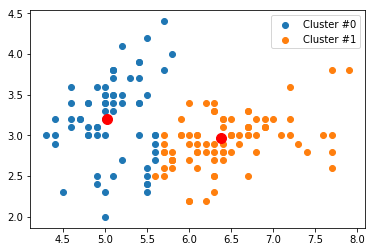

In [116]:
model = KMeans(
    n_clusters=2,
    init="random", #'k-means++', # default, also: random
    n_init=1, # default, also: 20, 5, 1
    max_iter=1, # default / 1
)
model.fit(iris)
cluster_labels = model.predict(iris)
plot_kmeans(iris, cluster_labels, model, 2)

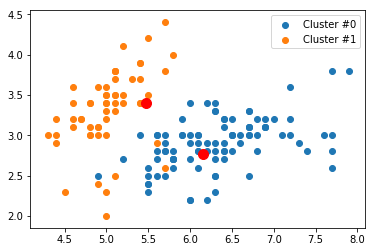

In [155]:
# 4-dimensional Iris dataset

model = KMeans(
    n_clusters=2,
    init="random", #'k-means++', # default, also: random
    n_init=1, # default, also: 20, 5, 1
    max_iter=1, # default / 1
)
model.fit(iris_4d)
cluster_labels = model.predict(iris_4d)
plot_kmeans(iris, cluster_labels, model, 2)

## Evaluation of clustering

* How to measure success of clustering with and without true class labels?
* How to find the optimal number of clusters?
* Which clustering method to choose with what parameters?

### Model evaluation

Several approaches have been developed for evaluating clustering models but are generally limited in requiring the true clusters to be known. In the general use case for clustering this is not known with the goal being exploratory. 

Ultimately, a model is just a tool to better understand the structure of our data. If we are able to gain insight from using a clustering algorithm then it has served its purpose.

Case specific: What was your goal? (e.g. ad targeting)

[The metrics](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) available are Adjusted Rand Index, Mutual Information based scores, Homogeneity, completeness, v-measure. All of these methods require knowledge of ground truth.

Silhouette coefficient and the elbow method do not require the true clusters to be known.

In [156]:
# Adjusted Rand index measures the similarity of the two assignments,
# ignoring permutations and with chance normalization
# -1 to 1
# 0 = random
# 1 = perfect
# < 0 = independent labels (bad)

from sklearn import metrics
labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [3, 3, 3, 5, 5, 5]

metrics.adjusted_rand_score(labels_true, labels_pred)  

1.0

In [157]:
from sklearn import metrics
model = KMeans(n_clusters=2)  # what if K=3?
model.fit(iris_4d)
cluster_labels = model.predict(iris_4d)

metrics.adjusted_rand_score(iris_true_labels, cluster_labels)

0.5399218294207123

In [158]:
# Mutual information measures the agreement of the two assignments, ignoring permutations.
# Adjusted MI is normalized against chance
# -1 to 1
# 1 = perfect
# 0 = random
# <0 = bad

metrics.adjusted_mutual_info_score(iris_true_labels, cluster_labels, average_method='arithmetic')

0.6538380713762779

In [159]:
# homogeneity: each cluster contains only members of a single class.
# completeness: all members of a given class are assigned to the same cluster.

# 0 to 1:  bad to perfect

np.round(
    metrics.homogeneity_completeness_v_measure(iris_true_labels, cluster_labels),
    2)

array([0.52, 0.88, 0.66])

### How to determine number of clusters

One important use for the model evaluation algorithms is in choosing the number of clusters. The clustering algorithms take as parameters either the number of clusters to partition a dataset into or other scaling factors that ultimately determine the number of clusters. It is left to the user to determine the correct value for these parameters.

As the number of clusters increases the fit to the data will always improve until each point is in a cluster by itself. As such, classical optimization algorithms searching for a minimum or maximum score will not work. Often, the goal is to find an inflection point.

If the cluster parameter is too low adding an additional cluster will have a large impact on the evaluation score. The gradient will be high at numbers of clusters less than the true value. If the cluster parameter is too high adding an additional cluster will have a small impact on the evaluation score. The gradient will be low at numbers of clusters higher than the true value.

At the correct number of clusters the gradient should suddenly change, this is an inflection point.

# The Elbow Method

One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.

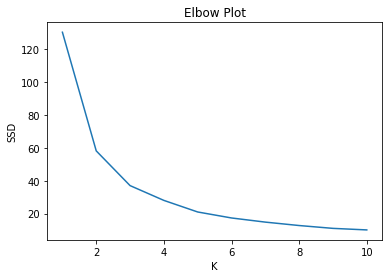

In [164]:
def plot_elbow(dataset, max_clusters):
    """Plot elbow curve for k-means."""
    inertias = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=768797)
        kmeans.fit(dataset)
        inertias.append(kmeans.inertia_)

    plt.plot(range(1, max_clusters + 1), inertias)
    plt.title("Elbow Plot")
    plt.xlabel("K")
    plt.ylabel("SSD")

plot_elbow(iris, 10)

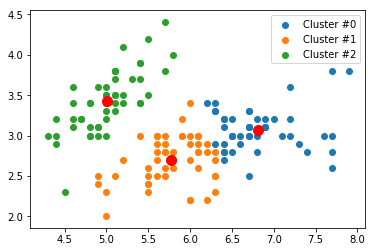

In [180]:
model = KMeans(n_clusters=3)
cluster_labels =model.fit_predict(iris)
plot_kmeans(iris, cluster_labels, model, 3)

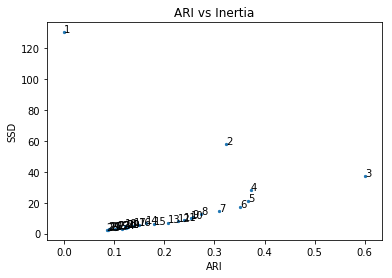

In [181]:
inertias = []
ARIs = []
Ks = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, random_state=768797)
    kmeans.fit(iris)
    labels = kmeans.predict(iris)
    inertias.append(kmeans.inertia_)
    ARIs.append(metrics.adjusted_rand_score(iris_true_labels, labels))
    Ks.append(str(i))

fig, ax = plt.subplots()
ax.scatter(ARIs, inertias, s=5)
plt.title("ARI vs Inertia")
plt.xlabel("ARI")
plt.ylabel("SSD")

for i, txt in enumerate(Ks):
    ax.annotate(txt, (ARIs[i], inertias[i]))

# Silhouette Coeff

A higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:
 
$$ s = \frac{b - a}{max(a, b)} $$


In [187]:
# Showing silhouette coefficient for each sample in each
# cluster is a powerful diagnostic tool
from sklearn.metrics.cluster import silhouette_samples

def plot_silhouette_diagnostics(n_clusters):
    # Compute the silhouette scores for each sample
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    lbls = kmeans.labels_
    values = silhouette_samples(X, lbls)

    g, ax = plt.subplots(figsize=(8, 6))
    color_scale = np.linspace(0, 1, n_clusters)
    y_lower = 1
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        v = sorted(values[lbls == i])
        cluster_size = len(v)
        y_upper = y_lower + cluster_size

        # color mapping:
        c = plt.cm.Set1(color_scale[i])
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, v, facecolor=c, edgecolor=c, alpha=0.8)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
        y_lower = y_upper + 1

    ax.set_xlabel("Silhouette coefficient")
    ax.set_ylabel("Cluster label")

    # Red dashed line shows an average silhouette score across all samples in all clusters
    score = silhouette_score(X, lbls, metric='l2')
    ax.axvline(x=score, color="red", linestyle="--")
    ax.set_yticks([])
    plt.show()

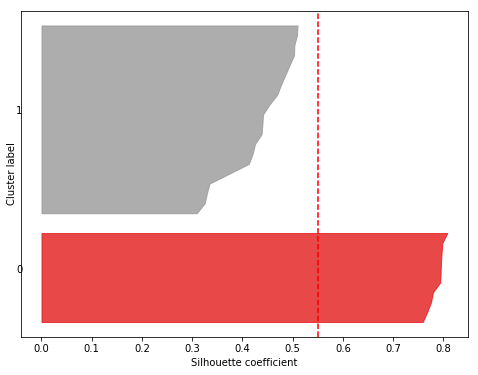

In [190]:
plot_silhouette_diagnostics(2)

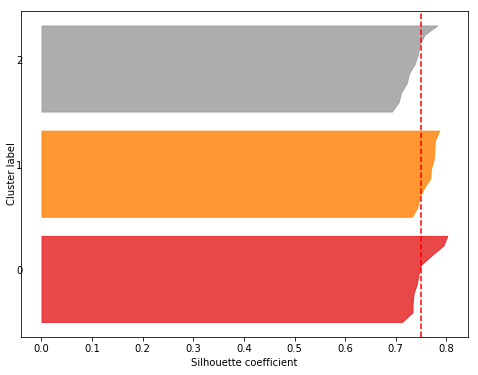

In [191]:
plot_silhouette_diagnostics(3)

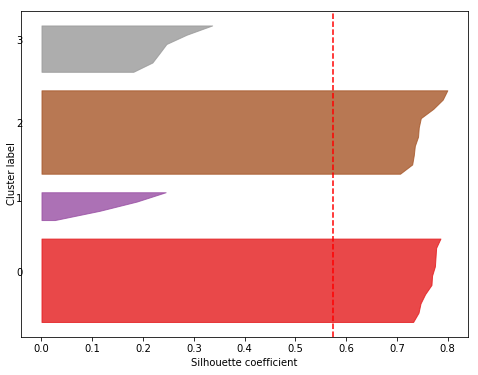

In [192]:
plot_silhouette_diagnostics(4)

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

The values are in the range of -1 to 1.

-1 = bad clustering 

1 = perfect dense clusters

0 = overlapping clusters

SC favors dense convex clusters and may fail in other cases.

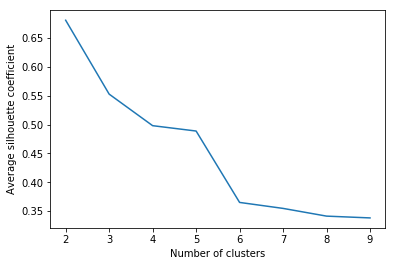

In [197]:
# Silhouette is used for assessing the performance of an unlabeled dataset
from sklearn.metrics.cluster import silhouette_score

def calc_silhouette(dataset, n):
    """Runs Kmeans clustering and returns average silhouette coefficient"""    
    kmeans = KMeans(n_clusters=n).fit(dataset)
    score = silhouette_score(dataset, kmeans.labels_)
    return score

scores = {n: calc_silhouette(iris_4d, n) for n in range(2, 10)}
# pprint.pprint(scores)
plt.plot(
    list(scores.keys()),
    list(scores.values())
)

plt.xlabel("Number of clusters")
plt.ylabel("Average silhouette coefficient")
plt.show()

## Overview of other clustering methods

### Mean shift

Mean shift does not require the number of clusters K, which is a huge advantage!

However depends on the radius parameter "r", it is not trivial to find it.

    sklearn.cluster.MeanShift(bandwidth=None, seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=None)

![](https://cdn-images-1.medium.com/max/1600/1*vyz94J_76dsVToaa4VG1Zg.gif)

### Density-based spacial clustering (DBSCAN)

Finds neighbors within a distance radius starting from random points.

    sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’, metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=None)

![](https://cdn-images-1.medium.com/max/1600/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

### Hierarchical clustering

**Agglomerative** hierarchical clustering starts with each observation is its own cluster, and pairs are joined (by a given criteria and metric) as you go up the tree.

**Metric**: Some kind of distance (Euclidean, Manhattan...)

**Criteria**: Distance between sets (max, min, average) corresponds to Complete linkage, Single linkage, UPGMA. Special case is Ward linkage which corresponds to minimum increase in total within-cluster variance after merging.

    sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, pooling_func=’deprecated’)


![](https://cdn-images-1.medium.com/max/1600/1*ET8kCcPpr893vNZFs8j4xg.gif)